# Telco Dataset 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
dataset = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [4]:
dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
dataset.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
dataset['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [7]:
df = dataset[dataset['InternetService'] == 'No']
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
11,7469-LKBCI,Male,0,No,No,16,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),18.95,326.8,No
16,8191-XWSZG,Female,0,No,No,52,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.65,1022.95,No
21,1680-VDCWW,Male,0,Yes,No,12,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Bank transfer (automatic),19.80,202.25,No
22,1066-JKSGK,Male,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.15,20.15,Yes
33,7310-EGVHZ,Male,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),20.20,20.2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7017,4807-IZYOZ,Female,0,No,No,51,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),20.65,1020.75,No
7019,9710-NJERN,Female,0,No,No,39,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.15,826,No
7020,9837-FWLCH,Male,0,Yes,Yes,12,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,19.20,239,No
7030,0871-OPBXW,Female,0,No,No,2,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.05,39.25,No


In [8]:
churnPer = dataset["Churn"][dataset["Churn"] == "Yes"]
print ("Churn Percentage = "+str( (churnPer.shape[0] / dataset["Churn"].shape[0]) * 100 ))

Churn Percentage = 26.536987079369588


# Data Visualizations

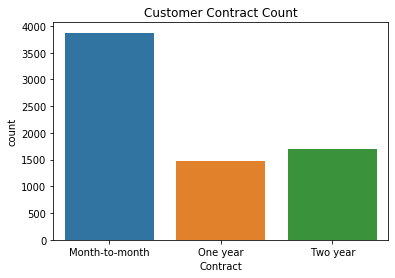

In [9]:
plt.title('Customer vs Count')
sns.countplot(dataset['Contract'])

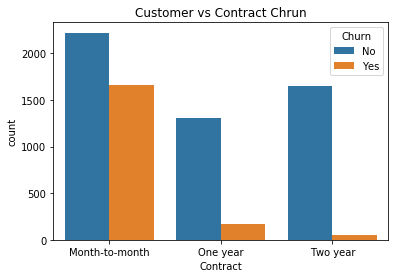

In [10]:
plt.title('Customer vs Contract Chrun')
sns.countplot(dataset['Contract'], hue=dataset['Churn'])

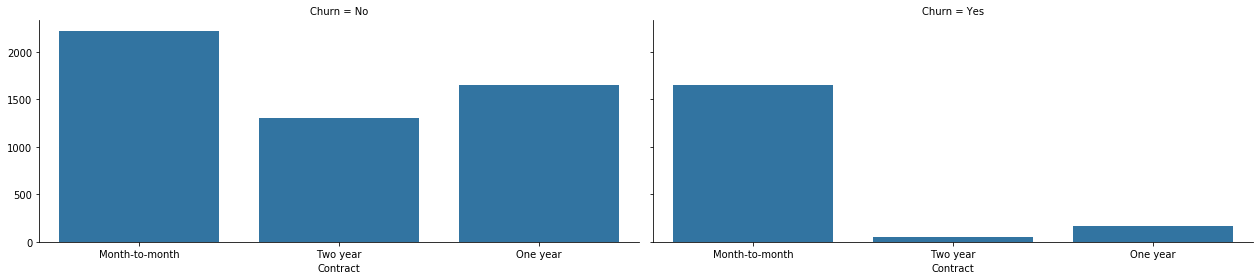

In [14]:
a = sns.FacetGrid(dataset, col='Churn', size=4, aspect=2.2)
a = a.map(sns.countplot, 'Contract' )

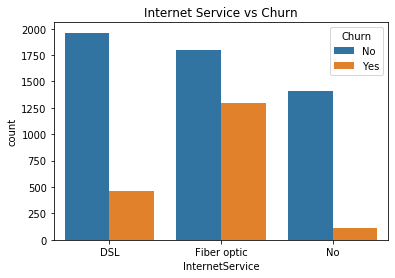

In [16]:
plt.title('Internet Service vs Churn')
sns.countplot(dataset['InternetService'], hue=dataset['Churn'])

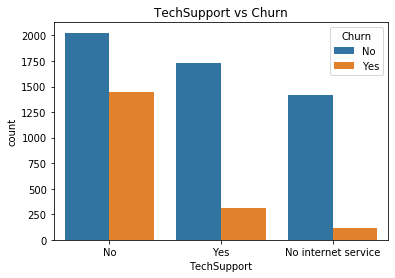

In [17]:
plt.title('TechSupport vs Churn')
sns.countplot(dataset['TechSupport'], hue=dataset['Churn'])

In [22]:
dataset = dataset.drop(['MultipleLines', 'Dependents', 'Partner', 'DeviceProtection',
                        'StreamingTV', 'StreamingMovies', 'PaperlessBilling'], axis=1)

In [23]:
dataset.tail()

,customerID,gender,SeniorCitizen,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,TechSupport,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,24,Yes,DSL,Yes,No,Yes,One year,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,72,Yes,Fiber optic,No,Yes,No,One year,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,11,No,DSL,Yes,No,No,Month-to-month,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,4,Yes,Fiber optic,No,No,No,Month-to-month,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,66,Yes,Fiber optic,Yes,No,Yes,Two year,Bank transfer (automatic),105.65,6844.5,No


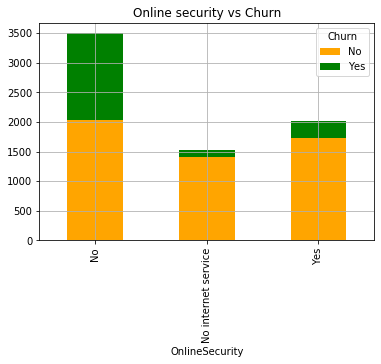

In [24]:
pt = pd.crosstab(dataset['OnlineSecurity'], dataset['Churn'])
pt.plot(kind = 'bar', stacked = True, color = ['orange', 'green'], grid = True, title='Online security vs Churn')

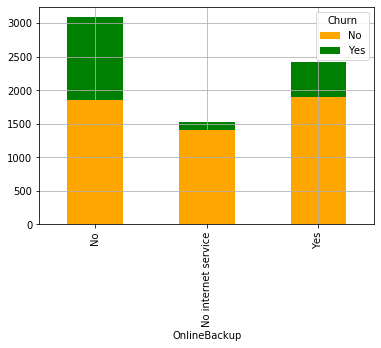

In [25]:
pt = pd.crosstab(dataset['OnlineBackup'], dataset['Churn'])
pt.plot(kind = 'bar', stacked = True, color = ['orange', 'green'], grid = True)

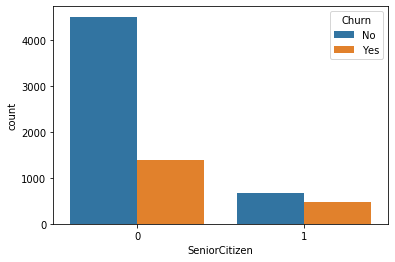

In [26]:
sns.countplot(dataset['SeniorCitizen'], hue=dataset['Churn'])

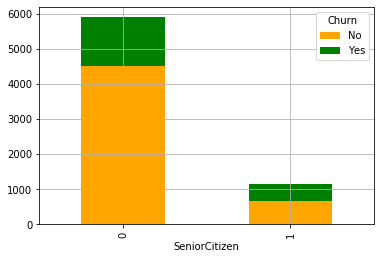

In [27]:
pt = pd.crosstab(dataset['SeniorCitizen'], dataset['Churn'])
pt.plot(kind = 'bar', stacked = True, color = ['orange', 'green'], grid = True)

In [28]:
dataset = dataset.drop(['customerID'], axis=1)

In [29]:
dataset = dataset.drop(['SeniorCitizen'], axis = 1)
dataset

,gender,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,TechSupport,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,1,No,DSL,No,Yes,No,Month-to-month,Electronic check,29.85,29.85,No
1,Male,34,Yes,DSL,Yes,No,No,One year,Mailed check,56.95,1889.5,No
2,Male,2,Yes,DSL,Yes,Yes,No,Month-to-month,Mailed check,53.85,108.15,Yes
3,Male,45,No,DSL,Yes,No,Yes,One year,Bank transfer (automatic),42.30,1840.75,No
4,Female,2,Yes,Fiber optic,No,No,No,Month-to-month,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,24,Yes,DSL,Yes,No,Yes,One year,Mailed check,84.80,1990.5,No
7039,Female,72,Yes,Fiber optic,No,Yes,No,One year,Credit card (automatic),103.20,7362.9,No
7040,Female,11,No,DSL,Yes,No,No,Month-to-month,Electronic check,29.60,346.45,No
7041,Male,4,Yes,Fiber optic,No,No,No,Month-to-month,Mailed check,74.40,306.6,Yes


In [30]:
dataset['tenure'].value_counts()

1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64

#Feature Engineering of tenure

In [31]:
def cat_tenure(x):
    if x >= 0 and x <= 12:
        return 'One'
    elif x >= 13 and x <= 36:
        return 'Two'
    elif x >= 37 and x <= 48:
        return 'Three'
    elif x >= 49 and x <= 60:
        return 'Four'
    else:
        return 'Five'
dataset['TenureDivision'] = dataset['tenure'].apply(cat_tenure)

In [32]:
dataset

,gender,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,TechSupport,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TenureDivision
0,Female,1,No,DSL,No,Yes,No,Month-to-month,Electronic check,29.85,29.85,No,One
1,Male,34,Yes,DSL,Yes,No,No,One year,Mailed check,56.95,1889.5,No,Two
2,Male,2,Yes,DSL,Yes,Yes,No,Month-to-month,Mailed check,53.85,108.15,Yes,One
3,Male,45,No,DSL,Yes,No,Yes,One year,Bank transfer (automatic),42.30,1840.75,No,Three
4,Female,2,Yes,Fiber optic,No,No,No,Month-to-month,Electronic check,70.70,151.65,Yes,One
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,24,Yes,DSL,Yes,No,Yes,One year,Mailed check,84.80,1990.5,No,Two
7039,Female,72,Yes,Fiber optic,No,Yes,No,One year,Credit card (automatic),103.20,7362.9,No,Five
7040,Female,11,No,DSL,Yes,No,No,Month-to-month,Electronic check,29.60,346.45,No,One
7041,Male,4,Yes,Fiber optic,No,No,No,Month-to-month,Mailed check,74.40,306.6,Yes,One


In [33]:
dataset['MonthlyCharges'].value_counts()

20.05     61
19.85     45
19.95     44
19.90     44
20.00     43
          ..
114.75     1
103.60     1
113.40     1
57.65      1
113.30     1
Name: MonthlyCharges, Length: 1585, dtype: int64

In [34]:
dataset['MonthlyCharges'].describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

In [35]:
def cat_monthlyChar(x):
    if x >= 0 and x <= 34:
        return 'Lowly charged'
    elif x >= 35 and x <= 69:
        return 'Moderately charged'
    elif x >= 70 and x <= 88:
        return 'Highly charged'
    else:
        return 'Over charged'
dataset['MonthlyChargedDivision'] = dataset['MonthlyCharges'].apply(cat_monthlyChar)

In [36]:
dataset

,gender,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,TechSupport,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TenureDivision,MonthlyChargedDivision
0,Female,1,No,DSL,No,Yes,No,Month-to-month,Electronic check,29.85,29.85,No,One,Lowly charged
1,Male,34,Yes,DSL,Yes,No,No,One year,Mailed check,56.95,1889.5,No,Two,Moderately charged
2,Male,2,Yes,DSL,Yes,Yes,No,Month-to-month,Mailed check,53.85,108.15,Yes,One,Moderately charged
3,Male,45,No,DSL,Yes,No,Yes,One year,Bank transfer (automatic),42.30,1840.75,No,Three,Moderately charged
4,Female,2,Yes,Fiber optic,No,No,No,Month-to-month,Electronic check,70.70,151.65,Yes,One,Highly charged
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,24,Yes,DSL,Yes,No,Yes,One year,Mailed check,84.80,1990.5,No,Two,Highly charged
7039,Female,72,Yes,Fiber optic,No,Yes,No,One year,Credit card (automatic),103.20,7362.9,No,Five,Over charged
7040,Female,11,No,DSL,Yes,No,No,Month-to-month,Electronic check,29.60,346.45,No,One,Lowly charged
7041,Male,4,Yes,Fiber optic,No,No,No,Month-to-month,Mailed check,74.40,306.6,Yes,One,Highly charged


In [37]:
dataset['TotalCharges'].value_counts()

20.2       11
           11
19.75       9
19.65       8
19.9        8
           ..
6921.7      1
4421.95     1
2931        1
677.05      1
1386.9      1
Name: TotalCharges, Length: 6531, dtype: int64

In [38]:
dataset['TotalCharges'].describe()

count     7043
unique    6531
top       20.2
freq        11
Name: TotalCharges, dtype: object

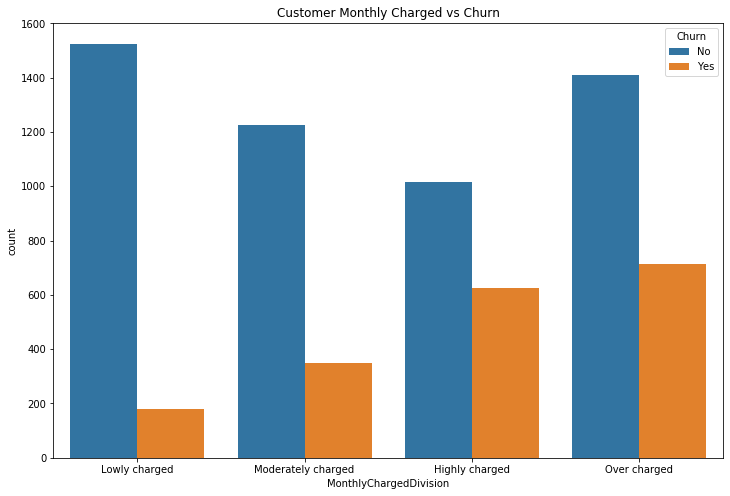

In [41]:
plt.figure(figsize=[12,8])
plt.title('Customer Monthly Charged vs Churn')
sns.countplot(dataset['MonthlyChargedDivision'], hue=dataset['Churn'])

In [32]:
dataset = dataset.drop(['TotalCharges'], axis = 1)
dataset

,gender,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,TechSupport,Contract,PaymentMethod,MonthlyCharges,Churn,TenureDivision,MonthlyChargedDivision
0,Female,1,No,DSL,No,Yes,No,Month-to-month,Electronic check,29.85,No,One,Lowly charged
1,Male,34,Yes,DSL,Yes,No,No,One year,Mailed check,56.95,No,Two,Moderately charged
2,Male,2,Yes,DSL,Yes,Yes,No,Month-to-month,Mailed check,53.85,Yes,One,Moderately charged
3,Male,45,No,DSL,Yes,No,Yes,One year,Bank transfer (automatic),42.30,No,Three,Moderately charged
4,Female,2,Yes,Fiber optic,No,No,No,Month-to-month,Electronic check,70.70,Yes,One,Highly charged
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,24,Yes,DSL,Yes,No,Yes,One year,Mailed check,84.80,No,Two,Highly charged
7039,Female,72,Yes,Fiber optic,No,Yes,No,One year,Credit card (automatic),103.20,No,Five,Over charged
7040,Female,11,No,DSL,Yes,No,No,Month-to-month,Electronic check,29.60,No,One,Lowly charged
7041,Male,4,Yes,Fiber optic,No,No,No,Month-to-month,Mailed check,74.40,Yes,One,Highly charged


In [33]:
dataset = dataset.drop(['tenure', 'MonthlyCharges'], axis = 1)
dataset

,gender,PhoneService,InternetService,OnlineSecurity,OnlineBackup,TechSupport,Contract,PaymentMethod,Churn,TenureDivision,MonthlyChargedDivision
0,Female,No,DSL,No,Yes,No,Month-to-month,Electronic check,No,One,Lowly charged
1,Male,Yes,DSL,Yes,No,No,One year,Mailed check,No,Two,Moderately charged
2,Male,Yes,DSL,Yes,Yes,No,Month-to-month,Mailed check,Yes,One,Moderately charged
3,Male,No,DSL,Yes,No,Yes,One year,Bank transfer (automatic),No,Three,Moderately charged
4,Female,Yes,Fiber optic,No,No,No,Month-to-month,Electronic check,Yes,One,Highly charged
...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,Yes,DSL,Yes,No,Yes,One year,Mailed check,No,Two,Highly charged
7039,Female,Yes,Fiber optic,No,Yes,No,One year,Credit card (automatic),No,Five,Over charged
7040,Female,No,DSL,Yes,No,No,Month-to-month,Electronic check,No,One,Lowly charged
7041,Male,Yes,Fiber optic,No,No,No,Month-to-month,Mailed check,Yes,One,Highly charged


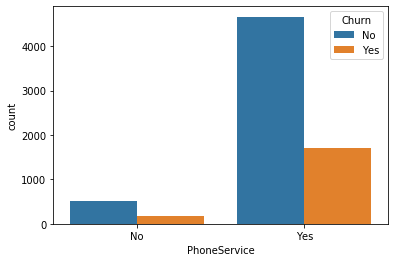

In [34]:
sns.countplot(dataset['PhoneService'], hue=dataset['Churn'])

In [35]:
x = dataset.drop(['Churn'], axis = 1)
x

,gender,PhoneService,InternetService,OnlineSecurity,OnlineBackup,TechSupport,Contract,PaymentMethod,TenureDivision,MonthlyChargedDivision
0,Female,No,DSL,No,Yes,No,Month-to-month,Electronic check,One,Lowly charged
1,Male,Yes,DSL,Yes,No,No,One year,Mailed check,Two,Moderately charged
2,Male,Yes,DSL,Yes,Yes,No,Month-to-month,Mailed check,One,Moderately charged
3,Male,No,DSL,Yes,No,Yes,One year,Bank transfer (automatic),Three,Moderately charged
4,Female,Yes,Fiber optic,No,No,No,Month-to-month,Electronic check,One,Highly charged
...,...,...,...,...,...,...,...,...,...,...
7038,Male,Yes,DSL,Yes,No,Yes,One year,Mailed check,Two,Highly charged
7039,Female,Yes,Fiber optic,No,Yes,No,One year,Credit card (automatic),Five,Over charged
7040,Female,No,DSL,Yes,No,No,Month-to-month,Electronic check,One,Lowly charged
7041,Male,Yes,Fiber optic,No,No,No,Month-to-month,Mailed check,One,Highly charged


In [36]:
y = dataset['Churn']
y

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7043, dtype: object

In [37]:
y = y.map({"No": 0, "Yes": 1})
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

In [38]:
type(y)

pandas.core.series.Series

In [39]:
y = pd.DataFrame(y)
y

,Churn
0,0
1,0
2,1
3,0
4,1
...,...
7038,0
7039,0
7040,0
7041,1


In [40]:
from sklearn.model_selection import train_test_split

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=850)

In [42]:
cate_features_index=np.where(x.dtypes != float)[0]

In [43]:
from catboost import CatBoostClassifier, Pool, cv

In [63]:
model = CatBoostClassifier(iterations=5000, depth=8, learning_rate=0.07, eval_metric ='Accuracy',use_best_model=True, random_seed=42)
model.fit(x_train,y_train,cat_features=cate_features_index,eval_set=(x_test,y_test))

0:	learn: 0.7381674	test: 0.7240204	best: 0.7240204 (0)	total: 9.93ms	remaining: 49.7s
1:	learn: 0.7381674	test: 0.7240204	best: 0.7240204 (0)	total: 15.3ms	remaining: 38.3s
2:	learn: 0.7381674	test: 0.7240204	best: 0.7240204 (0)	total: 21.9ms	remaining: 36.5s
3:	learn: 0.7381674	test: 0.7240204	best: 0.7240204 (0)	total: 30.2ms	remaining: 37.7s
4:	learn: 0.7381674	test: 0.7240204	best: 0.7240204 (0)	total: 35.1ms	remaining: 35.1s
5:	learn: 0.7381674	test: 0.7240204	best: 0.7240204 (0)	total: 39.1ms	remaining: 32.6s
6:	learn: 0.7747066	test: 0.7762635	best: 0.7762635 (6)	total: 44ms	remaining: 31.4s
7:	learn: 0.7860659	test: 0.7859171	best: 0.7859171 (7)	total: 49.8ms	remaining: 31.1s
8:	learn: 0.7864445	test: 0.7859171	best: 0.7859171 (7)	total: 61.6ms	remaining: 34.2s
9:	learn: 0.7860659	test: 0.7859171	best: 0.7859171 (7)	total: 67.4ms	remaining: 33.6s
10:	learn: 0.7856872	test: 0.7859171	best: 0.7859171 (7)	total: 72.7ms	remaining: 33s
11:	learn: 0.7858766	test: 0.7859171	best: 0.7

94:	learn: 0.8169254	test: 0.7944350	best: 0.7978421 (19)	total: 1.04s	remaining: 53.9s
95:	learn: 0.8157895	test: 0.7950028	best: 0.7978421 (19)	total: 1.06s	remaining: 54.4s
96:	learn: 0.8159788	test: 0.7944350	best: 0.7978421 (19)	total: 1.09s	remaining: 55.3s
97:	learn: 0.8161681	test: 0.7944350	best: 0.7978421 (19)	total: 1.1s	remaining: 55.2s
98:	learn: 0.8161681	test: 0.7944350	best: 0.7978421 (19)	total: 1.12s	remaining: 55.4s
99:	learn: 0.8163574	test: 0.7944350	best: 0.7978421 (19)	total: 1.13s	remaining: 55.5s
100:	learn: 0.8169254	test: 0.7944350	best: 0.7978421 (19)	total: 1.15s	remaining: 55.6s
101:	learn: 0.8167361	test: 0.7932993	best: 0.7978421 (19)	total: 1.16s	remaining: 55.8s
102:	learn: 0.8174934	test: 0.7938671	best: 0.7978421 (19)	total: 1.17s	remaining: 55.9s
103:	learn: 0.8169254	test: 0.7932993	best: 0.7978421 (19)	total: 1.19s	remaining: 55.9s
104:	learn: 0.8165468	test: 0.7932993	best: 0.7978421 (19)	total: 1.2s	remaining: 56.1s
105:	learn: 0.8180613	test: 0

188:	learn: 0.8405907	test: 0.7898921	best: 0.7978421 (19)	total: 2.51s	remaining: 1m 3s
189:	learn: 0.8402120	test: 0.7898921	best: 0.7978421 (19)	total: 2.53s	remaining: 1m 4s
190:	learn: 0.8407800	test: 0.7898921	best: 0.7978421 (19)	total: 2.55s	remaining: 1m 4s
191:	learn: 0.8407800	test: 0.7904600	best: 0.7978421 (19)	total: 2.56s	remaining: 1m 4s
192:	learn: 0.8411587	test: 0.7898921	best: 0.7978421 (19)	total: 2.57s	remaining: 1m 4s
193:	learn: 0.8415373	test: 0.7893242	best: 0.7978421 (19)	total: 2.59s	remaining: 1m 4s
194:	learn: 0.8419159	test: 0.7898921	best: 0.7978421 (19)	total: 2.6s	remaining: 1m 4s
195:	learn: 0.8428626	test: 0.7893242	best: 0.7978421 (19)	total: 2.62s	remaining: 1m 4s
196:	learn: 0.8434305	test: 0.7893242	best: 0.7978421 (19)	total: 2.63s	remaining: 1m 4s
197:	learn: 0.8447558	test: 0.7893242	best: 0.7978421 (19)	total: 2.65s	remaining: 1m 4s
198:	learn: 0.8447558	test: 0.7893242	best: 0.7978421 (19)	total: 2.66s	remaining: 1m 4s
199:	learn: 0.8449451	

281:	learn: 0.8619841	test: 0.7864850	best: 0.7978421 (19)	total: 3.98s	remaining: 1m 6s
282:	learn: 0.8619841	test: 0.7859171	best: 0.7978421 (19)	total: 4s	remaining: 1m 6s
283:	learn: 0.8627414	test: 0.7847814	best: 0.7978421 (19)	total: 4.01s	remaining: 1m 6s
284:	learn: 0.8631200	test: 0.7876207	best: 0.7978421 (19)	total: 4.03s	remaining: 1m 6s
285:	learn: 0.8636880	test: 0.7876207	best: 0.7978421 (19)	total: 4.05s	remaining: 1m 6s
286:	learn: 0.8633094	test: 0.7859171	best: 0.7978421 (19)	total: 4.06s	remaining: 1m 6s
287:	learn: 0.8646346	test: 0.7859171	best: 0.7978421 (19)	total: 4.08s	remaining: 1m 6s
288:	learn: 0.8642560	test: 0.7859171	best: 0.7978421 (19)	total: 4.09s	remaining: 1m 6s
289:	learn: 0.8648239	test: 0.7853492	best: 0.7978421 (19)	total: 4.11s	remaining: 1m 6s
290:	learn: 0.8657705	test: 0.7864850	best: 0.7978421 (19)	total: 4.12s	remaining: 1m 6s
291:	learn: 0.8657705	test: 0.7864850	best: 0.7978421 (19)	total: 4.14s	remaining: 1m 6s
292:	learn: 0.8669065	te

385:	learn: 0.8850814	test: 0.7859171	best: 0.7978421 (19)	total: 5.63s	remaining: 1m 7s
386:	learn: 0.8852707	test: 0.7847814	best: 0.7978421 (19)	total: 5.66s	remaining: 1m 7s
387:	learn: 0.8850814	test: 0.7847814	best: 0.7978421 (19)	total: 5.68s	remaining: 1m 7s
388:	learn: 0.8845134	test: 0.7847814	best: 0.7978421 (19)	total: 5.69s	remaining: 1m 7s
389:	learn: 0.8848921	test: 0.7847814	best: 0.7978421 (19)	total: 5.7s	remaining: 1m 7s
390:	learn: 0.8843241	test: 0.7842135	best: 0.7978421 (19)	total: 5.72s	remaining: 1m 7s
391:	learn: 0.8847028	test: 0.7853492	best: 0.7978421 (19)	total: 5.73s	remaining: 1m 7s
392:	learn: 0.8847028	test: 0.7853492	best: 0.7978421 (19)	total: 5.75s	remaining: 1m 7s
393:	learn: 0.8845134	test: 0.7853492	best: 0.7978421 (19)	total: 5.76s	remaining: 1m 7s
394:	learn: 0.8848921	test: 0.7853492	best: 0.7978421 (19)	total: 5.78s	remaining: 1m 7s
395:	learn: 0.8850814	test: 0.7853492	best: 0.7978421 (19)	total: 5.8s	remaining: 1m 7s
396:	learn: 0.8856494	t

488:	learn: 0.9015524	test: 0.7842135	best: 0.7978421 (19)	total: 7.34s	remaining: 1m 7s
489:	learn: 0.9013631	test: 0.7842135	best: 0.7978421 (19)	total: 7.36s	remaining: 1m 7s
490:	learn: 0.9023097	test: 0.7842135	best: 0.7978421 (19)	total: 7.38s	remaining: 1m 7s
491:	learn: 0.9023097	test: 0.7842135	best: 0.7978421 (19)	total: 7.4s	remaining: 1m 7s
492:	learn: 0.9028777	test: 0.7842135	best: 0.7978421 (19)	total: 7.42s	remaining: 1m 7s
493:	learn: 0.9028777	test: 0.7842135	best: 0.7978421 (19)	total: 7.44s	remaining: 1m 7s
494:	learn: 0.9028777	test: 0.7836457	best: 0.7978421 (19)	total: 7.46s	remaining: 1m 7s
495:	learn: 0.9028777	test: 0.7836457	best: 0.7978421 (19)	total: 7.47s	remaining: 1m 7s
496:	learn: 0.9032563	test: 0.7836457	best: 0.7978421 (19)	total: 7.49s	remaining: 1m 7s
497:	learn: 0.9030670	test: 0.7836457	best: 0.7978421 (19)	total: 7.5s	remaining: 1m 7s
498:	learn: 0.9023097	test: 0.7842135	best: 0.7978421 (19)	total: 7.53s	remaining: 1m 7s
499:	learn: 0.9023097	t

586:	learn: 0.9136691	test: 0.7836457	best: 0.7978421 (19)	total: 9.47s	remaining: 1m 11s
587:	learn: 0.9136691	test: 0.7836457	best: 0.7978421 (19)	total: 9.49s	remaining: 1m 11s
588:	learn: 0.9136691	test: 0.7836457	best: 0.7978421 (19)	total: 9.52s	remaining: 1m 11s
589:	learn: 0.9136691	test: 0.7836457	best: 0.7978421 (19)	total: 9.53s	remaining: 1m 11s
590:	learn: 0.9134797	test: 0.7836457	best: 0.7978421 (19)	total: 9.54s	remaining: 1m 11s
591:	learn: 0.9136691	test: 0.7836457	best: 0.7978421 (19)	total: 9.55s	remaining: 1m 11s
592:	learn: 0.9138584	test: 0.7836457	best: 0.7978421 (19)	total: 9.57s	remaining: 1m 11s
593:	learn: 0.9142370	test: 0.7836457	best: 0.7978421 (19)	total: 9.58s	remaining: 1m 11s
594:	learn: 0.9146157	test: 0.7836457	best: 0.7978421 (19)	total: 9.6s	remaining: 1m 11s
595:	learn: 0.9148050	test: 0.7836457	best: 0.7978421 (19)	total: 9.61s	remaining: 1m 11s
596:	learn: 0.9149943	test: 0.7836457	best: 0.7978421 (19)	total: 9.63s	remaining: 1m 11s
597:	learn:

682:	learn: 0.9210526	test: 0.7808064	best: 0.7978421 (19)	total: 11.4s	remaining: 1m 11s
683:	learn: 0.9208633	test: 0.7808064	best: 0.7978421 (19)	total: 11.4s	remaining: 1m 11s
684:	learn: 0.9208633	test: 0.7808064	best: 0.7978421 (19)	total: 11.4s	remaining: 1m 11s
685:	learn: 0.9206740	test: 0.7808064	best: 0.7978421 (19)	total: 11.4s	remaining: 1m 11s
686:	learn: 0.9206740	test: 0.7808064	best: 0.7978421 (19)	total: 11.4s	remaining: 1m 11s
687:	learn: 0.9208633	test: 0.7808064	best: 0.7978421 (19)	total: 11.5s	remaining: 1m 11s
688:	learn: 0.9208633	test: 0.7813742	best: 0.7978421 (19)	total: 11.5s	remaining: 1m 11s
689:	learn: 0.9212420	test: 0.7813742	best: 0.7978421 (19)	total: 11.5s	remaining: 1m 11s
690:	learn: 0.9208633	test: 0.7813742	best: 0.7978421 (19)	total: 11.5s	remaining: 1m 11s
691:	learn: 0.9214313	test: 0.7808064	best: 0.7978421 (19)	total: 11.6s	remaining: 1m 11s
692:	learn: 0.9212420	test: 0.7808064	best: 0.7978421 (19)	total: 11.6s	remaining: 1m 12s
693:	learn

783:	learn: 0.9278682	test: 0.7773992	best: 0.7978421 (19)	total: 13.2s	remaining: 1m 11s
784:	learn: 0.9284362	test: 0.7773992	best: 0.7978421 (19)	total: 13.2s	remaining: 1m 11s
785:	learn: 0.9288148	test: 0.7768313	best: 0.7978421 (19)	total: 13.3s	remaining: 1m 11s
786:	learn: 0.9284362	test: 0.7768313	best: 0.7978421 (19)	total: 13.3s	remaining: 1m 11s
787:	learn: 0.9284362	test: 0.7768313	best: 0.7978421 (19)	total: 13.3s	remaining: 1m 11s
788:	learn: 0.9288148	test: 0.7779671	best: 0.7978421 (19)	total: 13.3s	remaining: 1m 10s
789:	learn: 0.9290042	test: 0.7779671	best: 0.7978421 (19)	total: 13.3s	remaining: 1m 10s
790:	learn: 0.9290042	test: 0.7779671	best: 0.7978421 (19)	total: 13.3s	remaining: 1m 10s
791:	learn: 0.9284362	test: 0.7785349	best: 0.7978421 (19)	total: 13.3s	remaining: 1m 10s
792:	learn: 0.9284362	test: 0.7791028	best: 0.7978421 (19)	total: 13.4s	remaining: 1m 10s
793:	learn: 0.9284362	test: 0.7791028	best: 0.7978421 (19)	total: 13.4s	remaining: 1m 10s
794:	learn

881:	learn: 0.9360091	test: 0.7796706	best: 0.7978421 (19)	total: 14.7s	remaining: 1m 8s
882:	learn: 0.9356304	test: 0.7796706	best: 0.7978421 (19)	total: 14.7s	remaining: 1m 8s
883:	learn: 0.9358198	test: 0.7802385	best: 0.7978421 (19)	total: 14.7s	remaining: 1m 8s
884:	learn: 0.9358198	test: 0.7802385	best: 0.7978421 (19)	total: 14.8s	remaining: 1m 8s
885:	learn: 0.9358198	test: 0.7802385	best: 0.7978421 (19)	total: 14.8s	remaining: 1m 8s
886:	learn: 0.9358198	test: 0.7802385	best: 0.7978421 (19)	total: 14.8s	remaining: 1m 8s
887:	learn: 0.9358198	test: 0.7802385	best: 0.7978421 (19)	total: 14.8s	remaining: 1m 8s
888:	learn: 0.9361984	test: 0.7796706	best: 0.7978421 (19)	total: 14.8s	remaining: 1m 8s
889:	learn: 0.9358198	test: 0.7796706	best: 0.7978421 (19)	total: 14.8s	remaining: 1m 8s
890:	learn: 0.9360091	test: 0.7796706	best: 0.7978421 (19)	total: 14.8s	remaining: 1m 8s
891:	learn: 0.9360091	test: 0.7796706	best: 0.7978421 (19)	total: 14.9s	remaining: 1m 8s
892:	learn: 0.9360091

979:	learn: 0.9413101	test: 0.7785349	best: 0.7978421 (19)	total: 16.5s	remaining: 1m 7s
980:	learn: 0.9409315	test: 0.7785349	best: 0.7978421 (19)	total: 16.5s	remaining: 1m 7s
981:	learn: 0.9409315	test: 0.7785349	best: 0.7978421 (19)	total: 16.5s	remaining: 1m 7s
982:	learn: 0.9411208	test: 0.7785349	best: 0.7978421 (19)	total: 16.5s	remaining: 1m 7s
983:	learn: 0.9411208	test: 0.7785349	best: 0.7978421 (19)	total: 16.5s	remaining: 1m 7s
984:	learn: 0.9413101	test: 0.7779671	best: 0.7978421 (19)	total: 16.6s	remaining: 1m 7s
985:	learn: 0.9416888	test: 0.7779671	best: 0.7978421 (19)	total: 16.6s	remaining: 1m 7s
986:	learn: 0.9420674	test: 0.7785349	best: 0.7978421 (19)	total: 16.6s	remaining: 1m 7s
987:	learn: 0.9418781	test: 0.7785349	best: 0.7978421 (19)	total: 16.6s	remaining: 1m 7s
988:	learn: 0.9416888	test: 0.7785349	best: 0.7978421 (19)	total: 16.6s	remaining: 1m 7s
989:	learn: 0.9420674	test: 0.7779671	best: 0.7978421 (19)	total: 16.6s	remaining: 1m 7s
990:	learn: 0.9420674

1077:	learn: 0.9462325	test: 0.7779671	best: 0.7978421 (19)	total: 18.1s	remaining: 1m 6s
1078:	learn: 0.9462325	test: 0.7779671	best: 0.7978421 (19)	total: 18.2s	remaining: 1m 6s
1079:	learn: 0.9466111	test: 0.7779671	best: 0.7978421 (19)	total: 18.2s	remaining: 1m 6s
1080:	learn: 0.9466111	test: 0.7779671	best: 0.7978421 (19)	total: 18.2s	remaining: 1m 5s
1081:	learn: 0.9466111	test: 0.7779671	best: 0.7978421 (19)	total: 18.2s	remaining: 1m 5s
1082:	learn: 0.9469898	test: 0.7779671	best: 0.7978421 (19)	total: 18.2s	remaining: 1m 5s
1083:	learn: 0.9471791	test: 0.7773992	best: 0.7978421 (19)	total: 18.2s	remaining: 1m 5s
1084:	learn: 0.9468005	test: 0.7773992	best: 0.7978421 (19)	total: 18.3s	remaining: 1m 5s
1085:	learn: 0.9468005	test: 0.7773992	best: 0.7978421 (19)	total: 18.3s	remaining: 1m 5s
1086:	learn: 0.9471791	test: 0.7773992	best: 0.7978421 (19)	total: 18.3s	remaining: 1m 5s
1087:	learn: 0.9473684	test: 0.7773992	best: 0.7978421 (19)	total: 18.3s	remaining: 1m 5s
1088:	lear

1175:	learn: 0.9511549	test: 0.7802385	best: 0.7978421 (19)	total: 19.8s	remaining: 1m 4s
1176:	learn: 0.9515335	test: 0.7802385	best: 0.7978421 (19)	total: 19.8s	remaining: 1m 4s
1177:	learn: 0.9515335	test: 0.7802385	best: 0.7978421 (19)	total: 19.9s	remaining: 1m 4s
1178:	learn: 0.9513442	test: 0.7802385	best: 0.7978421 (19)	total: 19.9s	remaining: 1m 4s
1179:	learn: 0.9509655	test: 0.7802385	best: 0.7978421 (19)	total: 19.9s	remaining: 1m 4s
1180:	learn: 0.9509655	test: 0.7802385	best: 0.7978421 (19)	total: 19.9s	remaining: 1m 4s
1181:	learn: 0.9511549	test: 0.7802385	best: 0.7978421 (19)	total: 19.9s	remaining: 1m 4s
1182:	learn: 0.9515335	test: 0.7796706	best: 0.7978421 (19)	total: 19.9s	remaining: 1m 4s
1183:	learn: 0.9517228	test: 0.7796706	best: 0.7978421 (19)	total: 20s	remaining: 1m 4s
1184:	learn: 0.9517228	test: 0.7802385	best: 0.7978421 (19)	total: 20s	remaining: 1m 4s
1185:	learn: 0.9519122	test: 0.7802385	best: 0.7978421 (19)	total: 20s	remaining: 1m 4s
1186:	learn: 0.9

1271:	learn: 0.9545627	test: 0.7808064	best: 0.7978421 (19)	total: 21.5s	remaining: 1m 2s
1272:	learn: 0.9549413	test: 0.7808064	best: 0.7978421 (19)	total: 21.5s	remaining: 1m 2s
1273:	learn: 0.9549413	test: 0.7808064	best: 0.7978421 (19)	total: 21.5s	remaining: 1m 3s
1274:	learn: 0.9553200	test: 0.7808064	best: 0.7978421 (19)	total: 21.6s	remaining: 1m 3s
1275:	learn: 0.9553200	test: 0.7808064	best: 0.7978421 (19)	total: 21.6s	remaining: 1m 3s
1276:	learn: 0.9560772	test: 0.7808064	best: 0.7978421 (19)	total: 21.6s	remaining: 1m 3s
1277:	learn: 0.9560772	test: 0.7808064	best: 0.7978421 (19)	total: 21.6s	remaining: 1m 3s
1278:	learn: 0.9558879	test: 0.7808064	best: 0.7978421 (19)	total: 21.7s	remaining: 1m 3s
1279:	learn: 0.9558879	test: 0.7808064	best: 0.7978421 (19)	total: 21.7s	remaining: 1m 2s
1280:	learn: 0.9558879	test: 0.7808064	best: 0.7978421 (19)	total: 21.7s	remaining: 1m 2s
1281:	learn: 0.9558879	test: 0.7808064	best: 0.7978421 (19)	total: 21.7s	remaining: 1m 2s
1282:	lear

1375:	learn: 0.9579705	test: 0.7808064	best: 0.7978421 (19)	total: 23.3s	remaining: 1m 1s
1376:	learn: 0.9579705	test: 0.7808064	best: 0.7978421 (19)	total: 23.4s	remaining: 1m 1s
1377:	learn: 0.9579705	test: 0.7808064	best: 0.7978421 (19)	total: 23.4s	remaining: 1m 1s
1378:	learn: 0.9581598	test: 0.7808064	best: 0.7978421 (19)	total: 23.4s	remaining: 1m 1s
1379:	learn: 0.9581598	test: 0.7802385	best: 0.7978421 (19)	total: 23.4s	remaining: 1m 1s
1380:	learn: 0.9581598	test: 0.7802385	best: 0.7978421 (19)	total: 23.4s	remaining: 1m 1s
1381:	learn: 0.9581598	test: 0.7796706	best: 0.7978421 (19)	total: 23.5s	remaining: 1m 1s
1382:	learn: 0.9581598	test: 0.7796706	best: 0.7978421 (19)	total: 23.5s	remaining: 1m 1s
1383:	learn: 0.9581598	test: 0.7796706	best: 0.7978421 (19)	total: 23.5s	remaining: 1m 1s
1384:	learn: 0.9579705	test: 0.7796706	best: 0.7978421 (19)	total: 23.5s	remaining: 1m 1s
1385:	learn: 0.9581598	test: 0.7796706	best: 0.7978421 (19)	total: 23.5s	remaining: 1m 1s
1386:	lear

1475:	learn: 0.9617569	test: 0.7785349	best: 0.7978421 (19)	total: 25s	remaining: 59.7s
1476:	learn: 0.9619462	test: 0.7779671	best: 0.7978421 (19)	total: 25s	remaining: 59.7s
1477:	learn: 0.9619462	test: 0.7779671	best: 0.7978421 (19)	total: 25s	remaining: 59.7s
1478:	learn: 0.9619462	test: 0.7779671	best: 0.7978421 (19)	total: 25.1s	remaining: 59.7s
1479:	learn: 0.9621356	test: 0.7779671	best: 0.7978421 (19)	total: 25.1s	remaining: 59.6s
1480:	learn: 0.9621356	test: 0.7779671	best: 0.7978421 (19)	total: 25.1s	remaining: 59.6s
1481:	learn: 0.9619462	test: 0.7779671	best: 0.7978421 (19)	total: 25.1s	remaining: 59.6s
1482:	learn: 0.9619462	test: 0.7779671	best: 0.7978421 (19)	total: 25.1s	remaining: 59.6s
1483:	learn: 0.9617569	test: 0.7785349	best: 0.7978421 (19)	total: 25.1s	remaining: 59.5s
1484:	learn: 0.9619462	test: 0.7779671	best: 0.7978421 (19)	total: 25.1s	remaining: 59.5s
1485:	learn: 0.9619462	test: 0.7779671	best: 0.7978421 (19)	total: 25.2s	remaining: 59.5s
1486:	learn: 0.9

1571:	learn: 0.9645967	test: 0.7791028	best: 0.7978421 (19)	total: 26.5s	remaining: 57.8s
1572:	learn: 0.9645967	test: 0.7785349	best: 0.7978421 (19)	total: 26.5s	remaining: 57.8s
1573:	learn: 0.9645967	test: 0.7791028	best: 0.7978421 (19)	total: 26.6s	remaining: 57.8s
1574:	learn: 0.9645967	test: 0.7791028	best: 0.7978421 (19)	total: 26.6s	remaining: 57.8s
1575:	learn: 0.9645967	test: 0.7791028	best: 0.7978421 (19)	total: 26.6s	remaining: 57.7s
1576:	learn: 0.9645967	test: 0.7785349	best: 0.7978421 (19)	total: 26.6s	remaining: 57.7s
1577:	learn: 0.9645967	test: 0.7791028	best: 0.7978421 (19)	total: 26.6s	remaining: 57.7s
1578:	learn: 0.9645967	test: 0.7796706	best: 0.7978421 (19)	total: 26.6s	remaining: 57.7s
1579:	learn: 0.9645967	test: 0.7796706	best: 0.7978421 (19)	total: 26.6s	remaining: 57.6s
1580:	learn: 0.9645967	test: 0.7791028	best: 0.7978421 (19)	total: 26.6s	remaining: 57.6s
1581:	learn: 0.9645967	test: 0.7802385	best: 0.7978421 (19)	total: 26.7s	remaining: 57.6s
1582:	lear

1669:	learn: 0.9663006	test: 0.7785349	best: 0.7978421 (19)	total: 28s	remaining: 55.8s
1670:	learn: 0.9663006	test: 0.7791028	best: 0.7978421 (19)	total: 28s	remaining: 55.8s
1671:	learn: 0.9663006	test: 0.7791028	best: 0.7978421 (19)	total: 28s	remaining: 55.8s
1672:	learn: 0.9663006	test: 0.7791028	best: 0.7978421 (19)	total: 28s	remaining: 55.8s
1673:	learn: 0.9663006	test: 0.7791028	best: 0.7978421 (19)	total: 28.1s	remaining: 55.7s
1674:	learn: 0.9663006	test: 0.7791028	best: 0.7978421 (19)	total: 28.1s	remaining: 55.7s
1675:	learn: 0.9663006	test: 0.7779671	best: 0.7978421 (19)	total: 28.1s	remaining: 55.7s
1676:	learn: 0.9663006	test: 0.7779671	best: 0.7978421 (19)	total: 28.1s	remaining: 55.7s
1677:	learn: 0.9664900	test: 0.7779671	best: 0.7978421 (19)	total: 28.1s	remaining: 55.7s
1678:	learn: 0.9663006	test: 0.7785349	best: 0.7978421 (19)	total: 28.1s	remaining: 55.6s
1679:	learn: 0.9663006	test: 0.7785349	best: 0.7978421 (19)	total: 28.1s	remaining: 55.6s
1680:	learn: 0.965

1765:	learn: 0.9676259	test: 0.7808064	best: 0.7978421 (19)	total: 29.4s	remaining: 53.9s
1766:	learn: 0.9676259	test: 0.7802385	best: 0.7978421 (19)	total: 29.5s	remaining: 53.9s
1767:	learn: 0.9676259	test: 0.7819421	best: 0.7978421 (19)	total: 29.5s	remaining: 53.9s
1768:	learn: 0.9678152	test: 0.7813742	best: 0.7978421 (19)	total: 29.5s	remaining: 53.9s
1769:	learn: 0.9678152	test: 0.7808064	best: 0.7978421 (19)	total: 29.5s	remaining: 53.8s
1770:	learn: 0.9676259	test: 0.7808064	best: 0.7978421 (19)	total: 29.5s	remaining: 53.8s
1771:	learn: 0.9676259	test: 0.7813742	best: 0.7978421 (19)	total: 29.5s	remaining: 53.8s
1772:	learn: 0.9676259	test: 0.7819421	best: 0.7978421 (19)	total: 29.5s	remaining: 53.8s
1773:	learn: 0.9676259	test: 0.7819421	best: 0.7978421 (19)	total: 29.6s	remaining: 53.7s
1774:	learn: 0.9676259	test: 0.7819421	best: 0.7978421 (19)	total: 29.6s	remaining: 53.7s
1775:	learn: 0.9676259	test: 0.7819421	best: 0.7978421 (19)	total: 29.6s	remaining: 53.7s
1776:	lear

1862:	learn: 0.9693298	test: 0.7779671	best: 0.7978421 (19)	total: 30.9s	remaining: 52s
1863:	learn: 0.9693298	test: 0.7785349	best: 0.7978421 (19)	total: 30.9s	remaining: 52s
1864:	learn: 0.9691405	test: 0.7791028	best: 0.7978421 (19)	total: 30.9s	remaining: 52s
1865:	learn: 0.9691405	test: 0.7785349	best: 0.7978421 (19)	total: 31s	remaining: 52s
1866:	learn: 0.9693298	test: 0.7785349	best: 0.7978421 (19)	total: 31s	remaining: 52s
1867:	learn: 0.9693298	test: 0.7785349	best: 0.7978421 (19)	total: 31s	remaining: 51.9s
1868:	learn: 0.9695191	test: 0.7785349	best: 0.7978421 (19)	total: 31s	remaining: 51.9s
1869:	learn: 0.9695191	test: 0.7785349	best: 0.7978421 (19)	total: 31s	remaining: 51.9s
1870:	learn: 0.9693298	test: 0.7785349	best: 0.7978421 (19)	total: 31s	remaining: 51.9s
1871:	learn: 0.9691405	test: 0.7785349	best: 0.7978421 (19)	total: 31s	remaining: 51.9s
1872:	learn: 0.9693298	test: 0.7785349	best: 0.7978421 (19)	total: 31.1s	remaining: 51.8s
1873:	learn: 0.9693298	test: 0.778

1957:	learn: 0.9717910	test: 0.7796706	best: 0.7978421 (19)	total: 32.3s	remaining: 50.3s
1958:	learn: 0.9717910	test: 0.7796706	best: 0.7978421 (19)	total: 32.4s	remaining: 50.3s
1959:	learn: 0.9717910	test: 0.7796706	best: 0.7978421 (19)	total: 32.4s	remaining: 50.2s
1960:	learn: 0.9719803	test: 0.7796706	best: 0.7978421 (19)	total: 32.4s	remaining: 50.2s
1961:	learn: 0.9719803	test: 0.7796706	best: 0.7978421 (19)	total: 32.4s	remaining: 50.2s
1962:	learn: 0.9721696	test: 0.7796706	best: 0.7978421 (19)	total: 32.4s	remaining: 50.2s
1963:	learn: 0.9721696	test: 0.7796706	best: 0.7978421 (19)	total: 32.5s	remaining: 50.2s
1964:	learn: 0.9721696	test: 0.7796706	best: 0.7978421 (19)	total: 32.5s	remaining: 50.1s
1965:	learn: 0.9721696	test: 0.7796706	best: 0.7978421 (19)	total: 32.5s	remaining: 50.1s
1966:	learn: 0.9721696	test: 0.7796706	best: 0.7978421 (19)	total: 32.5s	remaining: 50.1s
1967:	learn: 0.9721696	test: 0.7796706	best: 0.7978421 (19)	total: 32.5s	remaining: 50.1s
1968:	lear

2054:	learn: 0.9731162	test: 0.7802385	best: 0.7978421 (19)	total: 33.9s	remaining: 48.5s
2055:	learn: 0.9731162	test: 0.7796706	best: 0.7978421 (19)	total: 33.9s	remaining: 48.5s
2056:	learn: 0.9733056	test: 0.7796706	best: 0.7978421 (19)	total: 33.9s	remaining: 48.5s
2057:	learn: 0.9733056	test: 0.7796706	best: 0.7978421 (19)	total: 33.9s	remaining: 48.5s
2058:	learn: 0.9733056	test: 0.7791028	best: 0.7978421 (19)	total: 33.9s	remaining: 48.5s
2059:	learn: 0.9733056	test: 0.7796706	best: 0.7978421 (19)	total: 33.9s	remaining: 48.4s
2060:	learn: 0.9733056	test: 0.7802385	best: 0.7978421 (19)	total: 34s	remaining: 48.4s
2061:	learn: 0.9733056	test: 0.7802385	best: 0.7978421 (19)	total: 34s	remaining: 48.4s
2062:	learn: 0.9733056	test: 0.7802385	best: 0.7978421 (19)	total: 34s	remaining: 48.4s
2063:	learn: 0.9733056	test: 0.7802385	best: 0.7978421 (19)	total: 34s	remaining: 48.4s
2064:	learn: 0.9733056	test: 0.7802385	best: 0.7978421 (19)	total: 34s	remaining: 48.3s
2065:	learn: 0.97330

2151:	learn: 0.9742522	test: 0.7791028	best: 0.7978421 (19)	total: 35.3s	remaining: 46.7s
2152:	learn: 0.9740629	test: 0.7785349	best: 0.7978421 (19)	total: 35.3s	remaining: 46.7s
2153:	learn: 0.9740629	test: 0.7785349	best: 0.7978421 (19)	total: 35.4s	remaining: 46.7s
2154:	learn: 0.9738735	test: 0.7785349	best: 0.7978421 (19)	total: 35.4s	remaining: 46.7s
2155:	learn: 0.9740629	test: 0.7785349	best: 0.7978421 (19)	total: 35.4s	remaining: 46.7s
2156:	learn: 0.9740629	test: 0.7791028	best: 0.7978421 (19)	total: 35.4s	remaining: 46.6s
2157:	learn: 0.9740629	test: 0.7791028	best: 0.7978421 (19)	total: 35.4s	remaining: 46.6s
2158:	learn: 0.9738735	test: 0.7785349	best: 0.7978421 (19)	total: 35.4s	remaining: 46.6s
2159:	learn: 0.9738735	test: 0.7791028	best: 0.7978421 (19)	total: 35.4s	remaining: 46.6s
2160:	learn: 0.9738735	test: 0.7791028	best: 0.7978421 (19)	total: 35.4s	remaining: 46.6s
2161:	learn: 0.9738735	test: 0.7785349	best: 0.7978421 (19)	total: 35.5s	remaining: 46.5s
2162:	lear

2249:	learn: 0.9755774	test: 0.7802385	best: 0.7978421 (19)	total: 36.8s	remaining: 45s
2250:	learn: 0.9755774	test: 0.7802385	best: 0.7978421 (19)	total: 36.8s	remaining: 45s
2251:	learn: 0.9757668	test: 0.7802385	best: 0.7978421 (19)	total: 36.8s	remaining: 45s
2252:	learn: 0.9759561	test: 0.7802385	best: 0.7978421 (19)	total: 36.9s	remaining: 44.9s
2253:	learn: 0.9759561	test: 0.7802385	best: 0.7978421 (19)	total: 36.9s	remaining: 44.9s
2254:	learn: 0.9757668	test: 0.7796706	best: 0.7978421 (19)	total: 36.9s	remaining: 44.9s
2255:	learn: 0.9759561	test: 0.7796706	best: 0.7978421 (19)	total: 36.9s	remaining: 44.9s
2256:	learn: 0.9761454	test: 0.7796706	best: 0.7978421 (19)	total: 36.9s	remaining: 44.9s
2257:	learn: 0.9761454	test: 0.7802385	best: 0.7978421 (19)	total: 36.9s	remaining: 44.8s
2258:	learn: 0.9761454	test: 0.7802385	best: 0.7978421 (19)	total: 36.9s	remaining: 44.8s
2259:	learn: 0.9759561	test: 0.7802385	best: 0.7978421 (19)	total: 37s	remaining: 44.8s
2260:	learn: 0.976

2344:	learn: 0.9769027	test: 0.7802385	best: 0.7978421 (19)	total: 38.2s	remaining: 43.3s
2345:	learn: 0.9770920	test: 0.7796706	best: 0.7978421 (19)	total: 38.3s	remaining: 43.3s
2346:	learn: 0.9770920	test: 0.7796706	best: 0.7978421 (19)	total: 38.3s	remaining: 43.3s
2347:	learn: 0.9772813	test: 0.7796706	best: 0.7978421 (19)	total: 38.3s	remaining: 43.3s
2348:	learn: 0.9772813	test: 0.7796706	best: 0.7978421 (19)	total: 38.3s	remaining: 43.2s
2349:	learn: 0.9770920	test: 0.7796706	best: 0.7978421 (19)	total: 38.3s	remaining: 43.2s
2350:	learn: 0.9772813	test: 0.7796706	best: 0.7978421 (19)	total: 38.3s	remaining: 43.2s
2351:	learn: 0.9770920	test: 0.7796706	best: 0.7978421 (19)	total: 38.4s	remaining: 43.2s
2352:	learn: 0.9770920	test: 0.7796706	best: 0.7978421 (19)	total: 38.4s	remaining: 43.2s
2353:	learn: 0.9769027	test: 0.7802385	best: 0.7978421 (19)	total: 38.4s	remaining: 43.1s
2354:	learn: 0.9769027	test: 0.7802385	best: 0.7978421 (19)	total: 38.4s	remaining: 43.1s
2355:	lear

2442:	learn: 0.9786066	test: 0.7791028	best: 0.7978421 (19)	total: 39.7s	remaining: 41.6s
2443:	learn: 0.9786066	test: 0.7791028	best: 0.7978421 (19)	total: 39.7s	remaining: 41.6s
2444:	learn: 0.9787959	test: 0.7791028	best: 0.7978421 (19)	total: 39.8s	remaining: 41.6s
2445:	learn: 0.9787959	test: 0.7791028	best: 0.7978421 (19)	total: 39.8s	remaining: 41.5s
2446:	learn: 0.9787959	test: 0.7791028	best: 0.7978421 (19)	total: 39.8s	remaining: 41.5s
2447:	learn: 0.9787959	test: 0.7785349	best: 0.7978421 (19)	total: 39.8s	remaining: 41.5s
2448:	learn: 0.9787959	test: 0.7785349	best: 0.7978421 (19)	total: 39.8s	remaining: 41.5s
2449:	learn: 0.9787959	test: 0.7791028	best: 0.7978421 (19)	total: 39.8s	remaining: 41.5s
2450:	learn: 0.9787959	test: 0.7791028	best: 0.7978421 (19)	total: 39.8s	remaining: 41.4s
2451:	learn: 0.9787959	test: 0.7791028	best: 0.7978421 (19)	total: 39.9s	remaining: 41.4s
2452:	learn: 0.9787959	test: 0.7791028	best: 0.7978421 (19)	total: 39.9s	remaining: 41.4s
2453:	lear

2540:	learn: 0.9787959	test: 0.7779671	best: 0.7978421 (19)	total: 41.2s	remaining: 39.9s
2541:	learn: 0.9787959	test: 0.7779671	best: 0.7978421 (19)	total: 41.2s	remaining: 39.9s
2542:	learn: 0.9787959	test: 0.7779671	best: 0.7978421 (19)	total: 41.2s	remaining: 39.9s
2543:	learn: 0.9787959	test: 0.7779671	best: 0.7978421 (19)	total: 41.3s	remaining: 39.8s
2544:	learn: 0.9787959	test: 0.7785349	best: 0.7978421 (19)	total: 41.3s	remaining: 39.8s
2545:	learn: 0.9787959	test: 0.7785349	best: 0.7978421 (19)	total: 41.3s	remaining: 39.8s
2546:	learn: 0.9787959	test: 0.7785349	best: 0.7978421 (19)	total: 41.3s	remaining: 39.8s
2547:	learn: 0.9787959	test: 0.7785349	best: 0.7978421 (19)	total: 41.3s	remaining: 39.8s
2548:	learn: 0.9787959	test: 0.7785349	best: 0.7978421 (19)	total: 41.3s	remaining: 39.7s
2549:	learn: 0.9787959	test: 0.7785349	best: 0.7978421 (19)	total: 41.3s	remaining: 39.7s
2550:	learn: 0.9787959	test: 0.7785349	best: 0.7978421 (19)	total: 41.4s	remaining: 39.7s
2551:	lear

2638:	learn: 0.9797425	test: 0.7808064	best: 0.7978421 (19)	total: 42.7s	remaining: 38.2s
2639:	learn: 0.9797425	test: 0.7802385	best: 0.7978421 (19)	total: 42.7s	remaining: 38.2s
2640:	learn: 0.9797425	test: 0.7808064	best: 0.7978421 (19)	total: 42.7s	remaining: 38.1s
2641:	learn: 0.9799318	test: 0.7808064	best: 0.7978421 (19)	total: 42.7s	remaining: 38.1s
2642:	learn: 0.9799318	test: 0.7808064	best: 0.7978421 (19)	total: 42.7s	remaining: 38.1s
2643:	learn: 0.9799318	test: 0.7808064	best: 0.7978421 (19)	total: 42.7s	remaining: 38.1s
2644:	learn: 0.9801212	test: 0.7796706	best: 0.7978421 (19)	total: 42.8s	remaining: 38.1s
2645:	learn: 0.9803105	test: 0.7796706	best: 0.7978421 (19)	total: 42.8s	remaining: 38s
2646:	learn: 0.9803105	test: 0.7802385	best: 0.7978421 (19)	total: 42.8s	remaining: 38s
2647:	learn: 0.9803105	test: 0.7802385	best: 0.7978421 (19)	total: 42.8s	remaining: 38s
2648:	learn: 0.9803105	test: 0.7796706	best: 0.7978421 (19)	total: 42.8s	remaining: 38s
2649:	learn: 0.980

2739:	learn: 0.9812571	test: 0.7808064	best: 0.7978421 (19)	total: 44.1s	remaining: 36.4s
2740:	learn: 0.9812571	test: 0.7808064	best: 0.7978421 (19)	total: 44.2s	remaining: 36.4s
2741:	learn: 0.9812571	test: 0.7808064	best: 0.7978421 (19)	total: 44.2s	remaining: 36.4s
2742:	learn: 0.9814464	test: 0.7808064	best: 0.7978421 (19)	total: 44.2s	remaining: 36.4s
2743:	learn: 0.9810678	test: 0.7808064	best: 0.7978421 (19)	total: 44.2s	remaining: 36.3s
2744:	learn: 0.9812571	test: 0.7808064	best: 0.7978421 (19)	total: 44.2s	remaining: 36.3s
2745:	learn: 0.9812571	test: 0.7808064	best: 0.7978421 (19)	total: 44.2s	remaining: 36.3s
2746:	learn: 0.9810678	test: 0.7808064	best: 0.7978421 (19)	total: 44.3s	remaining: 36.3s
2747:	learn: 0.9808785	test: 0.7808064	best: 0.7978421 (19)	total: 44.3s	remaining: 36.3s
2748:	learn: 0.9810678	test: 0.7808064	best: 0.7978421 (19)	total: 44.3s	remaining: 36.3s
2749:	learn: 0.9810678	test: 0.7808064	best: 0.7978421 (19)	total: 44.3s	remaining: 36.2s
2750:	lear

2836:	learn: 0.9822037	test: 0.7785349	best: 0.7978421 (19)	total: 45.6s	remaining: 34.8s
2837:	learn: 0.9822037	test: 0.7785349	best: 0.7978421 (19)	total: 45.6s	remaining: 34.8s
2838:	learn: 0.9822037	test: 0.7785349	best: 0.7978421 (19)	total: 45.6s	remaining: 34.7s
2839:	learn: 0.9822037	test: 0.7785349	best: 0.7978421 (19)	total: 45.7s	remaining: 34.7s
2840:	learn: 0.9822037	test: 0.7785349	best: 0.7978421 (19)	total: 45.7s	remaining: 34.7s
2841:	learn: 0.9822037	test: 0.7785349	best: 0.7978421 (19)	total: 45.7s	remaining: 34.7s
2842:	learn: 0.9822037	test: 0.7785349	best: 0.7978421 (19)	total: 45.7s	remaining: 34.7s
2843:	learn: 0.9822037	test: 0.7785349	best: 0.7978421 (19)	total: 45.7s	remaining: 34.7s
2844:	learn: 0.9822037	test: 0.7785349	best: 0.7978421 (19)	total: 45.7s	remaining: 34.6s
2845:	learn: 0.9823930	test: 0.7785349	best: 0.7978421 (19)	total: 45.7s	remaining: 34.6s
2846:	learn: 0.9823930	test: 0.7785349	best: 0.7978421 (19)	total: 45.8s	remaining: 34.6s
2847:	lear

2932:	learn: 0.9829610	test: 0.7785349	best: 0.7978421 (19)	total: 47.1s	remaining: 33.2s
2933:	learn: 0.9831503	test: 0.7785349	best: 0.7978421 (19)	total: 47.1s	remaining: 33.2s
2934:	learn: 0.9831503	test: 0.7785349	best: 0.7978421 (19)	total: 47.1s	remaining: 33.1s
2935:	learn: 0.9831503	test: 0.7785349	best: 0.7978421 (19)	total: 47.1s	remaining: 33.1s
2936:	learn: 0.9831503	test: 0.7768313	best: 0.7978421 (19)	total: 47.1s	remaining: 33.1s
2937:	learn: 0.9831503	test: 0.7768313	best: 0.7978421 (19)	total: 47.1s	remaining: 33.1s
2938:	learn: 0.9831503	test: 0.7768313	best: 0.7978421 (19)	total: 47.2s	remaining: 33.1s
2939:	learn: 0.9831503	test: 0.7768313	best: 0.7978421 (19)	total: 47.2s	remaining: 33.1s
2940:	learn: 0.9831503	test: 0.7768313	best: 0.7978421 (19)	total: 47.2s	remaining: 33s
2941:	learn: 0.9831503	test: 0.7768313	best: 0.7978421 (19)	total: 47.2s	remaining: 33s
2942:	learn: 0.9833396	test: 0.7785349	best: 0.7978421 (19)	total: 47.2s	remaining: 33s
2943:	learn: 0.9

3029:	learn: 0.9837183	test: 0.7791028	best: 0.7978421 (19)	total: 48.5s	remaining: 31.6s
3030:	learn: 0.9837183	test: 0.7791028	best: 0.7978421 (19)	total: 48.6s	remaining: 31.5s
3031:	learn: 0.9839076	test: 0.7791028	best: 0.7978421 (19)	total: 48.6s	remaining: 31.5s
3032:	learn: 0.9839076	test: 0.7791028	best: 0.7978421 (19)	total: 48.6s	remaining: 31.5s
3033:	learn: 0.9839076	test: 0.7791028	best: 0.7978421 (19)	total: 48.6s	remaining: 31.5s
3034:	learn: 0.9839076	test: 0.7791028	best: 0.7978421 (19)	total: 48.6s	remaining: 31.5s
3035:	learn: 0.9839076	test: 0.7791028	best: 0.7978421 (19)	total: 48.6s	remaining: 31.5s
3036:	learn: 0.9839076	test: 0.7791028	best: 0.7978421 (19)	total: 48.6s	remaining: 31.4s
3037:	learn: 0.9839076	test: 0.7791028	best: 0.7978421 (19)	total: 48.7s	remaining: 31.4s
3038:	learn: 0.9839076	test: 0.7791028	best: 0.7978421 (19)	total: 48.7s	remaining: 31.4s
3039:	learn: 0.9840969	test: 0.7791028	best: 0.7978421 (19)	total: 48.7s	remaining: 31.4s
3040:	lear

3123:	learn: 0.9844756	test: 0.7768313	best: 0.7978421 (19)	total: 50s	remaining: 30s
3124:	learn: 0.9844756	test: 0.7768313	best: 0.7978421 (19)	total: 50s	remaining: 30s
3125:	learn: 0.9844756	test: 0.7768313	best: 0.7978421 (19)	total: 50s	remaining: 30s
3126:	learn: 0.9846649	test: 0.7768313	best: 0.7978421 (19)	total: 50s	remaining: 30s
3127:	learn: 0.9844756	test: 0.7768313	best: 0.7978421 (19)	total: 50s	remaining: 29.9s
3128:	learn: 0.9846649	test: 0.7785349	best: 0.7978421 (19)	total: 50.1s	remaining: 29.9s
3129:	learn: 0.9846649	test: 0.7785349	best: 0.7978421 (19)	total: 50.1s	remaining: 29.9s
3130:	learn: 0.9846649	test: 0.7779671	best: 0.7978421 (19)	total: 50.1s	remaining: 29.9s
3131:	learn: 0.9848542	test: 0.7779671	best: 0.7978421 (19)	total: 50.1s	remaining: 29.9s
3132:	learn: 0.9848542	test: 0.7779671	best: 0.7978421 (19)	total: 50.1s	remaining: 29.9s
3133:	learn: 0.9848542	test: 0.7779671	best: 0.7978421 (19)	total: 50.1s	remaining: 29.8s
3134:	learn: 0.9846649	test:

3222:	learn: 0.9859902	test: 0.7739920	best: 0.7978421 (19)	total: 52.2s	remaining: 28.8s
3223:	learn: 0.9859902	test: 0.7739920	best: 0.7978421 (19)	total: 52.2s	remaining: 28.7s
3224:	learn: 0.9858008	test: 0.7739920	best: 0.7978421 (19)	total: 52.2s	remaining: 28.7s
3225:	learn: 0.9858008	test: 0.7739920	best: 0.7978421 (19)	total: 52.2s	remaining: 28.7s
3226:	learn: 0.9858008	test: 0.7739920	best: 0.7978421 (19)	total: 52.2s	remaining: 28.7s
3227:	learn: 0.9859902	test: 0.7739920	best: 0.7978421 (19)	total: 52.3s	remaining: 28.7s
3228:	learn: 0.9859902	test: 0.7739920	best: 0.7978421 (19)	total: 52.3s	remaining: 28.7s
3229:	learn: 0.9859902	test: 0.7751278	best: 0.7978421 (19)	total: 52.3s	remaining: 28.7s
3230:	learn: 0.9859902	test: 0.7751278	best: 0.7978421 (19)	total: 52.3s	remaining: 28.6s
3231:	learn: 0.9861795	test: 0.7751278	best: 0.7978421 (19)	total: 52.3s	remaining: 28.6s
3232:	learn: 0.9861795	test: 0.7751278	best: 0.7978421 (19)	total: 52.4s	remaining: 28.6s
3233:	lear

3322:	learn: 0.9865581	test: 0.7751278	best: 0.7978421 (19)	total: 54.6s	remaining: 27.5s
3323:	learn: 0.9865581	test: 0.7745599	best: 0.7978421 (19)	total: 54.6s	remaining: 27.5s
3324:	learn: 0.9865581	test: 0.7745599	best: 0.7978421 (19)	total: 54.6s	remaining: 27.5s
3325:	learn: 0.9863688	test: 0.7745599	best: 0.7978421 (19)	total: 54.6s	remaining: 27.5s
3326:	learn: 0.9863688	test: 0.7745599	best: 0.7978421 (19)	total: 54.6s	remaining: 27.5s
3327:	learn: 0.9863688	test: 0.7745599	best: 0.7978421 (19)	total: 54.7s	remaining: 27.5s
3328:	learn: 0.9863688	test: 0.7745599	best: 0.7978421 (19)	total: 54.7s	remaining: 27.4s
3329:	learn: 0.9863688	test: 0.7745599	best: 0.7978421 (19)	total: 54.7s	remaining: 27.4s
3330:	learn: 0.9863688	test: 0.7745599	best: 0.7978421 (19)	total: 54.7s	remaining: 27.4s
3331:	learn: 0.9863688	test: 0.7745599	best: 0.7978421 (19)	total: 54.7s	remaining: 27.4s
3332:	learn: 0.9863688	test: 0.7745599	best: 0.7978421 (19)	total: 54.7s	remaining: 27.4s
3333:	lear

3414:	learn: 0.9865581	test: 0.7751278	best: 0.7978421 (19)	total: 56.5s	remaining: 26.2s
3415:	learn: 0.9865581	test: 0.7751278	best: 0.7978421 (19)	total: 56.6s	remaining: 26.2s
3416:	learn: 0.9865581	test: 0.7751278	best: 0.7978421 (19)	total: 56.6s	remaining: 26.2s
3417:	learn: 0.9863688	test: 0.7745599	best: 0.7978421 (19)	total: 56.6s	remaining: 26.2s
3418:	learn: 0.9865581	test: 0.7751278	best: 0.7978421 (19)	total: 56.6s	remaining: 26.2s
3419:	learn: 0.9867474	test: 0.7751278	best: 0.7978421 (19)	total: 56.7s	remaining: 26.2s
3420:	learn: 0.9867474	test: 0.7751278	best: 0.7978421 (19)	total: 56.7s	remaining: 26.2s
3421:	learn: 0.9867474	test: 0.7751278	best: 0.7978421 (19)	total: 56.7s	remaining: 26.2s
3422:	learn: 0.9867474	test: 0.7751278	best: 0.7978421 (19)	total: 56.7s	remaining: 26.1s
3423:	learn: 0.9867474	test: 0.7751278	best: 0.7978421 (19)	total: 56.8s	remaining: 26.1s
3424:	learn: 0.9867474	test: 0.7751278	best: 0.7978421 (19)	total: 56.8s	remaining: 26.1s
3425:	lear

3508:	learn: 0.9873154	test: 0.7734242	best: 0.7978421 (19)	total: 58s	remaining: 24.7s
3509:	learn: 0.9873154	test: 0.7734242	best: 0.7978421 (19)	total: 58.1s	remaining: 24.6s
3510:	learn: 0.9873154	test: 0.7734242	best: 0.7978421 (19)	total: 58.1s	remaining: 24.6s
3511:	learn: 0.9873154	test: 0.7734242	best: 0.7978421 (19)	total: 58.1s	remaining: 24.6s
3512:	learn: 0.9873154	test: 0.7734242	best: 0.7978421 (19)	total: 58.1s	remaining: 24.6s
3513:	learn: 0.9873154	test: 0.7734242	best: 0.7978421 (19)	total: 58.1s	remaining: 24.6s
3514:	learn: 0.9873154	test: 0.7734242	best: 0.7978421 (19)	total: 58.1s	remaining: 24.6s
3515:	learn: 0.9873154	test: 0.7734242	best: 0.7978421 (19)	total: 58.1s	remaining: 24.5s
3516:	learn: 0.9873154	test: 0.7734242	best: 0.7978421 (19)	total: 58.2s	remaining: 24.5s
3517:	learn: 0.9873154	test: 0.7734242	best: 0.7978421 (19)	total: 58.2s	remaining: 24.5s
3518:	learn: 0.9873154	test: 0.7734242	best: 0.7978421 (19)	total: 58.2s	remaining: 24.5s
3519:	learn:

3612:	learn: 0.9876941	test: 0.7745599	best: 0.7978421 (19)	total: 59.5s	remaining: 22.9s
3613:	learn: 0.9876941	test: 0.7745599	best: 0.7978421 (19)	total: 59.6s	remaining: 22.8s
3614:	learn: 0.9876941	test: 0.7745599	best: 0.7978421 (19)	total: 59.6s	remaining: 22.8s
3615:	learn: 0.9878834	test: 0.7745599	best: 0.7978421 (19)	total: 59.6s	remaining: 22.8s
3616:	learn: 0.9878834	test: 0.7745599	best: 0.7978421 (19)	total: 59.6s	remaining: 22.8s
3617:	learn: 0.9878834	test: 0.7745599	best: 0.7978421 (19)	total: 59.6s	remaining: 22.8s
3618:	learn: 0.9878834	test: 0.7745599	best: 0.7978421 (19)	total: 59.6s	remaining: 22.7s
3619:	learn: 0.9878834	test: 0.7739920	best: 0.7978421 (19)	total: 59.6s	remaining: 22.7s
3620:	learn: 0.9878834	test: 0.7739920	best: 0.7978421 (19)	total: 59.6s	remaining: 22.7s
3621:	learn: 0.9878834	test: 0.7745599	best: 0.7978421 (19)	total: 59.7s	remaining: 22.7s
3622:	learn: 0.9878834	test: 0.7745599	best: 0.7978421 (19)	total: 59.7s	remaining: 22.7s
3623:	lear

3715:	learn: 0.9875047	test: 0.7756956	best: 0.7978421 (19)	total: 1m 1s	remaining: 21.1s
3716:	learn: 0.9875047	test: 0.7756956	best: 0.7978421 (19)	total: 1m 1s	remaining: 21.1s
3717:	learn: 0.9875047	test: 0.7756956	best: 0.7978421 (19)	total: 1m 1s	remaining: 21.1s
3718:	learn: 0.9875047	test: 0.7756956	best: 0.7978421 (19)	total: 1m 1s	remaining: 21s
3719:	learn: 0.9875047	test: 0.7756956	best: 0.7978421 (19)	total: 1m 1s	remaining: 21s
3720:	learn: 0.9875047	test: 0.7756956	best: 0.7978421 (19)	total: 1m 1s	remaining: 21s
3721:	learn: 0.9875047	test: 0.7756956	best: 0.7978421 (19)	total: 1m 1s	remaining: 21s
3722:	learn: 0.9875047	test: 0.7756956	best: 0.7978421 (19)	total: 1m 1s	remaining: 21s
3723:	learn: 0.9875047	test: 0.7756956	best: 0.7978421 (19)	total: 1m 1s	remaining: 21s
3724:	learn: 0.9875047	test: 0.7756956	best: 0.7978421 (19)	total: 1m 1s	remaining: 20.9s
3725:	learn: 0.9875047	test: 0.7756956	best: 0.7978421 (19)	total: 1m 1s	remaining: 20.9s
3726:	learn: 0.9875047

3813:	learn: 0.9880727	test: 0.7762635	best: 0.7978421 (19)	total: 1m 2s	remaining: 19.4s
3814:	learn: 0.9880727	test: 0.7762635	best: 0.7978421 (19)	total: 1m 2s	remaining: 19.4s
3815:	learn: 0.9880727	test: 0.7762635	best: 0.7978421 (19)	total: 1m 2s	remaining: 19.4s
3816:	learn: 0.9878834	test: 0.7762635	best: 0.7978421 (19)	total: 1m 2s	remaining: 19.4s
3817:	learn: 0.9878834	test: 0.7762635	best: 0.7978421 (19)	total: 1m 2s	remaining: 19.4s
3818:	learn: 0.9878834	test: 0.7762635	best: 0.7978421 (19)	total: 1m 2s	remaining: 19.4s
3819:	learn: 0.9878834	test: 0.7762635	best: 0.7978421 (19)	total: 1m 2s	remaining: 19.3s
3820:	learn: 0.9878834	test: 0.7762635	best: 0.7978421 (19)	total: 1m 2s	remaining: 19.3s
3821:	learn: 0.9878834	test: 0.7762635	best: 0.7978421 (19)	total: 1m 2s	remaining: 19.3s
3822:	learn: 0.9878834	test: 0.7756956	best: 0.7978421 (19)	total: 1m 2s	remaining: 19.3s
3823:	learn: 0.9876941	test: 0.7756956	best: 0.7978421 (19)	total: 1m 2s	remaining: 19.3s
3824:	lear

3910:	learn: 0.9880727	test: 0.7677456	best: 0.7978421 (19)	total: 1m 3s	remaining: 17.8s
3911:	learn: 0.9880727	test: 0.7671777	best: 0.7978421 (19)	total: 1m 3s	remaining: 17.8s
3912:	learn: 0.9880727	test: 0.7671777	best: 0.7978421 (19)	total: 1m 3s	remaining: 17.8s
3913:	learn: 0.9880727	test: 0.7671777	best: 0.7978421 (19)	total: 1m 4s	remaining: 17.8s
3914:	learn: 0.9880727	test: 0.7671777	best: 0.7978421 (19)	total: 1m 4s	remaining: 17.7s
3915:	learn: 0.9880727	test: 0.7671777	best: 0.7978421 (19)	total: 1m 4s	remaining: 17.7s
3916:	learn: 0.9880727	test: 0.7671777	best: 0.7978421 (19)	total: 1m 4s	remaining: 17.7s
3917:	learn: 0.9880727	test: 0.7671777	best: 0.7978421 (19)	total: 1m 4s	remaining: 17.7s
3918:	learn: 0.9880727	test: 0.7671777	best: 0.7978421 (19)	total: 1m 4s	remaining: 17.7s
3919:	learn: 0.9880727	test: 0.7671777	best: 0.7978421 (19)	total: 1m 4s	remaining: 17.7s
3920:	learn: 0.9880727	test: 0.7677456	best: 0.7978421 (19)	total: 1m 4s	remaining: 17.6s
3921:	lear

4004:	learn: 0.9880727	test: 0.7683135	best: 0.7978421 (19)	total: 1m 5s	remaining: 16.3s
4005:	learn: 0.9880727	test: 0.7683135	best: 0.7978421 (19)	total: 1m 5s	remaining: 16.2s
4006:	learn: 0.9880727	test: 0.7683135	best: 0.7978421 (19)	total: 1m 5s	remaining: 16.2s
4007:	learn: 0.9880727	test: 0.7683135	best: 0.7978421 (19)	total: 1m 5s	remaining: 16.2s
4008:	learn: 0.9880727	test: 0.7677456	best: 0.7978421 (19)	total: 1m 5s	remaining: 16.2s
4009:	learn: 0.9878834	test: 0.7677456	best: 0.7978421 (19)	total: 1m 5s	remaining: 16.2s
4010:	learn: 0.9878834	test: 0.7677456	best: 0.7978421 (19)	total: 1m 5s	remaining: 16.2s
4011:	learn: 0.9878834	test: 0.7677456	best: 0.7978421 (19)	total: 1m 5s	remaining: 16.1s
4012:	learn: 0.9878834	test: 0.7677456	best: 0.7978421 (19)	total: 1m 5s	remaining: 16.1s
4013:	learn: 0.9878834	test: 0.7677456	best: 0.7978421 (19)	total: 1m 5s	remaining: 16.1s
4014:	learn: 0.9878834	test: 0.7677456	best: 0.7978421 (19)	total: 1m 5s	remaining: 16.1s
4015:	lear

4098:	learn: 0.9882620	test: 0.7683135	best: 0.7978421 (19)	total: 1m 6s	remaining: 14.7s
4099:	learn: 0.9880727	test: 0.7683135	best: 0.7978421 (19)	total: 1m 6s	remaining: 14.7s
4100:	learn: 0.9880727	test: 0.7683135	best: 0.7978421 (19)	total: 1m 6s	remaining: 14.7s
4101:	learn: 0.9880727	test: 0.7660420	best: 0.7978421 (19)	total: 1m 6s	remaining: 14.7s
4102:	learn: 0.9880727	test: 0.7660420	best: 0.7978421 (19)	total: 1m 6s	remaining: 14.6s
4103:	learn: 0.9880727	test: 0.7660420	best: 0.7978421 (19)	total: 1m 6s	remaining: 14.6s
4104:	learn: 0.9880727	test: 0.7660420	best: 0.7978421 (19)	total: 1m 6s	remaining: 14.6s
4105:	learn: 0.9880727	test: 0.7660420	best: 0.7978421 (19)	total: 1m 7s	remaining: 14.6s
4106:	learn: 0.9878834	test: 0.7660420	best: 0.7978421 (19)	total: 1m 7s	remaining: 14.6s
4107:	learn: 0.9878834	test: 0.7660420	best: 0.7978421 (19)	total: 1m 7s	remaining: 14.6s
4108:	learn: 0.9878834	test: 0.7660420	best: 0.7978421 (19)	total: 1m 7s	remaining: 14.5s
4109:	lear

4194:	learn: 0.9886407	test: 0.7654742	best: 0.7978421 (19)	total: 1m 8s	remaining: 13.1s
4195:	learn: 0.9886407	test: 0.7654742	best: 0.7978421 (19)	total: 1m 8s	remaining: 13.1s
4196:	learn: 0.9886407	test: 0.7654742	best: 0.7978421 (19)	total: 1m 8s	remaining: 13.1s
4197:	learn: 0.9886407	test: 0.7654742	best: 0.7978421 (19)	total: 1m 8s	remaining: 13.1s
4198:	learn: 0.9886407	test: 0.7654742	best: 0.7978421 (19)	total: 1m 8s	remaining: 13.1s
4199:	learn: 0.9886407	test: 0.7660420	best: 0.7978421 (19)	total: 1m 8s	remaining: 13s
4200:	learn: 0.9886407	test: 0.7660420	best: 0.7978421 (19)	total: 1m 8s	remaining: 13s
4201:	learn: 0.9886407	test: 0.7660420	best: 0.7978421 (19)	total: 1m 8s	remaining: 13s
4202:	learn: 0.9884513	test: 0.7654742	best: 0.7978421 (19)	total: 1m 8s	remaining: 13s
4203:	learn: 0.9882620	test: 0.7660420	best: 0.7978421 (19)	total: 1m 8s	remaining: 13s
4204:	learn: 0.9882620	test: 0.7654742	best: 0.7978421 (19)	total: 1m 8s	remaining: 13s
4205:	learn: 0.9884513

4292:	learn: 0.9888300	test: 0.7677456	best: 0.7978421 (19)	total: 1m 10s	remaining: 11.7s
4293:	learn: 0.9888300	test: 0.7677456	best: 0.7978421 (19)	total: 1m 10s	remaining: 11.6s
4294:	learn: 0.9888300	test: 0.7677456	best: 0.7978421 (19)	total: 1m 10s	remaining: 11.6s
4295:	learn: 0.9888300	test: 0.7677456	best: 0.7978421 (19)	total: 1m 10s	remaining: 11.6s
4296:	learn: 0.9888300	test: 0.7683135	best: 0.7978421 (19)	total: 1m 10s	remaining: 11.6s
4297:	learn: 0.9888300	test: 0.7683135	best: 0.7978421 (19)	total: 1m 10s	remaining: 11.6s
4298:	learn: 0.9888300	test: 0.7683135	best: 0.7978421 (19)	total: 1m 10s	remaining: 11.6s
4299:	learn: 0.9886407	test: 0.7683135	best: 0.7978421 (19)	total: 1m 10s	remaining: 11.6s
4300:	learn: 0.9886407	test: 0.7677456	best: 0.7978421 (19)	total: 1m 11s	remaining: 11.5s
4301:	learn: 0.9892086	test: 0.7683135	best: 0.7978421 (19)	total: 1m 11s	remaining: 11.5s
4302:	learn: 0.9893980	test: 0.7683135	best: 0.7978421 (19)	total: 1m 11s	remaining: 11.5s

4388:	learn: 0.9899659	test: 0.7688813	best: 0.7978421 (19)	total: 1m 13s	remaining: 10.3s
4389:	learn: 0.9899659	test: 0.7688813	best: 0.7978421 (19)	total: 1m 13s	remaining: 10.3s
4390:	learn: 0.9899659	test: 0.7688813	best: 0.7978421 (19)	total: 1m 13s	remaining: 10.3s
4391:	learn: 0.9899659	test: 0.7688813	best: 0.7978421 (19)	total: 1m 13s	remaining: 10.2s
4392:	learn: 0.9901552	test: 0.7688813	best: 0.7978421 (19)	total: 1m 14s	remaining: 10.2s
4393:	learn: 0.9901552	test: 0.7688813	best: 0.7978421 (19)	total: 1m 14s	remaining: 10.2s
4394:	learn: 0.9901552	test: 0.7688813	best: 0.7978421 (19)	total: 1m 14s	remaining: 10.2s
4395:	learn: 0.9901552	test: 0.7688813	best: 0.7978421 (19)	total: 1m 14s	remaining: 10.2s
4396:	learn: 0.9901552	test: 0.7688813	best: 0.7978421 (19)	total: 1m 14s	remaining: 10.2s
4397:	learn: 0.9901552	test: 0.7688813	best: 0.7978421 (19)	total: 1m 14s	remaining: 10.2s
4398:	learn: 0.9899659	test: 0.7688813	best: 0.7978421 (19)	total: 1m 14s	remaining: 10.1s

4483:	learn: 0.9903446	test: 0.7688813	best: 0.7978421 (19)	total: 1m 16s	remaining: 8.85s
4484:	learn: 0.9903446	test: 0.7688813	best: 0.7978421 (19)	total: 1m 16s	remaining: 8.83s
4485:	learn: 0.9901552	test: 0.7688813	best: 0.7978421 (19)	total: 1m 16s	remaining: 8.82s
4486:	learn: 0.9901552	test: 0.7688813	best: 0.7978421 (19)	total: 1m 16s	remaining: 8.8s
4487:	learn: 0.9901552	test: 0.7688813	best: 0.7978421 (19)	total: 1m 16s	remaining: 8.78s
4488:	learn: 0.9903446	test: 0.7688813	best: 0.7978421 (19)	total: 1m 16s	remaining: 8.76s
4489:	learn: 0.9901552	test: 0.7688813	best: 0.7978421 (19)	total: 1m 17s	remaining: 8.75s
4490:	learn: 0.9901552	test: 0.7688813	best: 0.7978421 (19)	total: 1m 17s	remaining: 8.73s
4491:	learn: 0.9901552	test: 0.7688813	best: 0.7978421 (19)	total: 1m 17s	remaining: 8.71s
4492:	learn: 0.9901552	test: 0.7688813	best: 0.7978421 (19)	total: 1m 17s	remaining: 8.69s
4493:	learn: 0.9901552	test: 0.7688813	best: 0.7978421 (19)	total: 1m 17s	remaining: 8.68s


4582:	learn: 0.9907232	test: 0.7603634	best: 0.7978421 (19)	total: 1m 18s	remaining: 7.15s
4583:	learn: 0.9907232	test: 0.7603634	best: 0.7978421 (19)	total: 1m 18s	remaining: 7.13s
4584:	learn: 0.9907232	test: 0.7603634	best: 0.7978421 (19)	total: 1m 18s	remaining: 7.12s
4585:	learn: 0.9909125	test: 0.7603634	best: 0.7978421 (19)	total: 1m 18s	remaining: 7.1s
4586:	learn: 0.9909125	test: 0.7603634	best: 0.7978421 (19)	total: 1m 18s	remaining: 7.08s
4587:	learn: 0.9907232	test: 0.7603634	best: 0.7978421 (19)	total: 1m 18s	remaining: 7.07s
4588:	learn: 0.9907232	test: 0.7603634	best: 0.7978421 (19)	total: 1m 18s	remaining: 7.05s
4589:	learn: 0.9907232	test: 0.7603634	best: 0.7978421 (19)	total: 1m 18s	remaining: 7.03s
4590:	learn: 0.9909125	test: 0.7609313	best: 0.7978421 (19)	total: 1m 18s	remaining: 7.01s
4591:	learn: 0.9909125	test: 0.7609313	best: 0.7978421 (19)	total: 1m 18s	remaining: 7s
4592:	learn: 0.9909125	test: 0.7609313	best: 0.7978421 (19)	total: 1m 18s	remaining: 6.98s
459

4683:	learn: 0.9907232	test: 0.7603634	best: 0.7978421 (19)	total: 1m 20s	remaining: 5.42s
4684:	learn: 0.9907232	test: 0.7603634	best: 0.7978421 (19)	total: 1m 20s	remaining: 5.4s
4685:	learn: 0.9907232	test: 0.7603634	best: 0.7978421 (19)	total: 1m 20s	remaining: 5.38s
4686:	learn: 0.9907232	test: 0.7603634	best: 0.7978421 (19)	total: 1m 20s	remaining: 5.36s
4687:	learn: 0.9907232	test: 0.7603634	best: 0.7978421 (19)	total: 1m 20s	remaining: 5.35s
4688:	learn: 0.9907232	test: 0.7603634	best: 0.7978421 (19)	total: 1m 20s	remaining: 5.33s
4689:	learn: 0.9907232	test: 0.7603634	best: 0.7978421 (19)	total: 1m 20s	remaining: 5.31s
4690:	learn: 0.9907232	test: 0.7614991	best: 0.7978421 (19)	total: 1m 20s	remaining: 5.29s
4691:	learn: 0.9907232	test: 0.7614991	best: 0.7978421 (19)	total: 1m 20s	remaining: 5.28s
4692:	learn: 0.9907232	test: 0.7614991	best: 0.7978421 (19)	total: 1m 20s	remaining: 5.26s
4693:	learn: 0.9907232	test: 0.7614991	best: 0.7978421 (19)	total: 1m 20s	remaining: 5.24s


4778:	learn: 0.9907232	test: 0.7609313	best: 0.7978421 (19)	total: 1m 21s	remaining: 3.78s
4779:	learn: 0.9907232	test: 0.7609313	best: 0.7978421 (19)	total: 1m 21s	remaining: 3.76s
4780:	learn: 0.9909125	test: 0.7609313	best: 0.7978421 (19)	total: 1m 21s	remaining: 3.75s
4781:	learn: 0.9909125	test: 0.7609313	best: 0.7978421 (19)	total: 1m 21s	remaining: 3.73s
4782:	learn: 0.9909125	test: 0.7609313	best: 0.7978421 (19)	total: 1m 21s	remaining: 3.71s
4783:	learn: 0.9909125	test: 0.7609313	best: 0.7978421 (19)	total: 1m 21s	remaining: 3.69s
4784:	learn: 0.9909125	test: 0.7609313	best: 0.7978421 (19)	total: 1m 21s	remaining: 3.68s
4785:	learn: 0.9909125	test: 0.7609313	best: 0.7978421 (19)	total: 1m 21s	remaining: 3.66s
4786:	learn: 0.9909125	test: 0.7609313	best: 0.7978421 (19)	total: 1m 21s	remaining: 3.64s
4787:	learn: 0.9909125	test: 0.7609313	best: 0.7978421 (19)	total: 1m 21s	remaining: 3.63s
4788:	learn: 0.9909125	test: 0.7609313	best: 0.7978421 (19)	total: 1m 21s	remaining: 3.61s

4877:	learn: 0.9911019	test: 0.7614991	best: 0.7978421 (19)	total: 1m 23s	remaining: 2.08s
4878:	learn: 0.9911019	test: 0.7614991	best: 0.7978421 (19)	total: 1m 23s	remaining: 2.06s
4879:	learn: 0.9911019	test: 0.7614991	best: 0.7978421 (19)	total: 1m 23s	remaining: 2.05s
4880:	learn: 0.9911019	test: 0.7614991	best: 0.7978421 (19)	total: 1m 23s	remaining: 2.03s
4881:	learn: 0.9911019	test: 0.7614991	best: 0.7978421 (19)	total: 1m 23s	remaining: 2.01s
4882:	learn: 0.9911019	test: 0.7614991	best: 0.7978421 (19)	total: 1m 23s	remaining: 2s
4883:	learn: 0.9912912	test: 0.7614991	best: 0.7978421 (19)	total: 1m 23s	remaining: 1.98s
4884:	learn: 0.9912912	test: 0.7614991	best: 0.7978421 (19)	total: 1m 23s	remaining: 1.96s
4885:	learn: 0.9912912	test: 0.7614991	best: 0.7978421 (19)	total: 1m 23s	remaining: 1.94s
4886:	learn: 0.9912912	test: 0.7614991	best: 0.7978421 (19)	total: 1m 23s	remaining: 1.93s
4887:	learn: 0.9912912	test: 0.7614991	best: 0.7978421 (19)	total: 1m 23s	remaining: 1.91s
48

4980:	learn: 0.9916698	test: 0.7711528	best: 0.7978421 (19)	total: 1m 24s	remaining: 324ms
4981:	learn: 0.9916698	test: 0.7711528	best: 0.7978421 (19)	total: 1m 24s	remaining: 307ms
4982:	learn: 0.9916698	test: 0.7711528	best: 0.7978421 (19)	total: 1m 24s	remaining: 290ms
4983:	learn: 0.9916698	test: 0.7711528	best: 0.7978421 (19)	total: 1m 24s	remaining: 273ms
4984:	learn: 0.9916698	test: 0.7711528	best: 0.7978421 (19)	total: 1m 24s	remaining: 256ms
4985:	learn: 0.9916698	test: 0.7711528	best: 0.7978421 (19)	total: 1m 24s	remaining: 239ms
4986:	learn: 0.9916698	test: 0.7711528	best: 0.7978421 (19)	total: 1m 25s	remaining: 222ms
4987:	learn: 0.9916698	test: 0.7711528	best: 0.7978421 (19)	total: 1m 25s	remaining: 205ms
4988:	learn: 0.9916698	test: 0.7711528	best: 0.7978421 (19)	total: 1m 25s	remaining: 188ms
4989:	learn: 0.9916698	test: 0.7711528	best: 0.7978421 (19)	total: 1m 25s	remaining: 171ms
4990:	learn: 0.9916698	test: 0.7711528	best: 0.7978421 (19)	total: 1m 25s	remaining: 153ms

In [64]:
y_pred = model.predict(x_train)

In [65]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [66]:
cm = confusion_matrix(y_train,y_pred)
cm

array([[3543,  356],
       [ 691,  692]])

In [67]:
accuracy_score(y_train,y_pred) * 100

80.17796289284362

In [68]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      3899
           1       0.66      0.50      0.57      1383

    accuracy                           0.80      5282
   macro avg       0.75      0.70      0.72      5282
weighted avg       0.79      0.80      0.79      5282



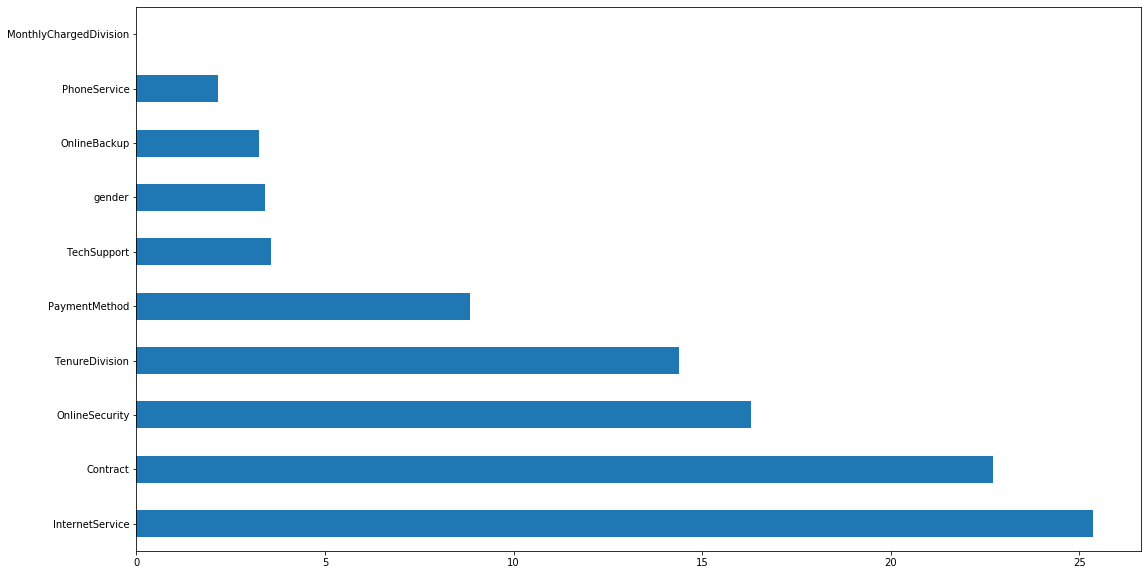

In [71]:
feature_importance = model.feature_importances_
feat_importances = pd.Series(model.feature_importances_, index=x_train.columns)
feat_importances = feat_importances.nlargest(19)
feat_importances.plot(kind='barh' , figsize=(18,10))